<a href="https://colab.research.google.com/github/RongyiDai/Data-Project/blob/master/Amy_Dai_ComputationalProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Project 3: PageRank

In this project, our goals are 
+ to learn about an application of linear algebra to the ranking of webpages, and 
+ to see eigenvectors and eigenvalues in action.


Please refer to the [Lecture 6 demonstration](https://colab.research.google.com/drive/15hcR--leZTtidWdZqDFJI8E6WwvLl_fB) for reference on matrix computation with python.  Please see the lecture slides on detailed background on PageRank.

This project is due on Friday May 10 at 9am EST.

## Background

The PageRank algorithm is a method for ranking the importance of webpages in search engine results.  The method is named after Larry Page, a Google co-founder.

The algorithm involves some neat linear algebra, which is explained in detail in Lecture 21.

While the method was invented for the purpose of ranking webpages, it has found a wide range of applications in other fields.  Here are some examples:
+ [An application of Google’s PageRank to NFL rankings](https://msp.org/involve/2012/5-4/involve-v5-n4-p07-s.pdf)
+ [Predicting species extinction using PageRank](https://www.wired.com/2009/09/googlefoodwebs/)
+ [Researchers fight toxic water with Google PageRank](http://www.wired.com/2012/02/google-pagerank-water)
+ [Assessing the relative performance of track athletes in competitions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5456068/)
+ and many others

## Your Project

### Part Zero: Setup

We will need to use the packages `numpy` and `scipy`.  **In the code cell below, please import them as `np` and `sp`, respectively**.

The packages `networkx`, `io`, and `requests` have also been imported so that we can work with data downloaded from the internet.  ***You do not need to modify codes involving these packages***

In [0]:
# import numpy and scipy, then run the cell
import numpy as np
import scipy as sp


# Do not modify the code below the line 
#------------------------------------------------------- 
import networkx as nx
from io import BytesIO
import requests

### Part One

Suppose that the directed graph below is a network of webpages.  

<img src = "https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig1.png" width="250">

**Your Tasks**

1. Specify the initial vector `v_0`.
+ Specify the adjacency matrix $A$ for the graph.  (You should enter the entries of this matrix by hand.)
+ Find the transition matrix $T$.  (You can enter the entries of this matrix by hand, or use $A$ and the appropriate numpy functions to find $T$ )
+ Compute the PageRank vector in two ways:
  + Find all eigenvectors and eigenvalues of $T$ using `np.linalg.eig( MATRIXNAME )`
  + Compute the PageRank vector by computing the dominant eigenvector of $T$ **using the power method**
+ Comments and Interpretation <br>
<i>Keep in mind that there is no right answer to some of the questions below.  We just want you to tell us your interpretation of your results.</i>
  + What is PageRank vector which you found in the above computation?  Please interpret these numbers and list the "webpages"/vertices from most important to least important.
  + Does the ranking you found above make sense compared to what the graph looks like?  Before the PageRank vector was computed, which "webpage"/vertex would you guess to be most important?  Does it agree with the PageRank vector that you found?
  + When computing the PageRank vector using the power method, how many iterations  (i.e., how many times do you multiply $\vec v(0)$ by $T$?) did you carry out?  How did you decide when to stop?  Do you think that a lot of iterations were needed?

In [0]:
# Your code for Part 1
def transition(A):
  v_sum = np.sum(A.T, axis = 0)
  T = A.T / v_sum
  return T
  
v_0 = np.matrix([[1/5],[1/5],[1/5],[1/5],[1/5]])
A = np.matrix([[0,1,0,0,0], [1,0,1,0,0], [0,0,0,1,0], [0,0,1,0,1], [1,1,0,0,0]])
T = transition(A)
print (T)

T_T = np.linalg.eig(T)
#print (T_T)

for i in range(25):
  v_0 = T * v_0
  if i >= 15:
    print (v_0)
  



* The PageRank vector I found is [0.176, 0.235, 0.235, 0.235, 0.118]. I think the importance of the webpages is 2 = 3 = 4 > 1 > 5, since after 25 times of multiplying the transition matrix by the initial vector, the components of the vector reaches a limit, which indicates that is the possible eigenvector. Since the 2nd, 3rd, 4th component are all approximately 0.235, they have the equal possibility to be accessed to. 
* Before the eigenvector was computed, I expected node 2 to be the most important, since in the graph node 2 has the most number of arrows (2 inward and 2 outward), which indicates it's a "busy" place. And node 1 and 3 will be the following. So it turns out that there are some differences between my intuition and the fact. But I think the final result still makes sense, because 3 only links to 4, if we are on 3, we must go to 4 afterwards, which makes 4 equally important as 3. Also, if we are on 2, we are not necessarily linked to 1, but if we are on 1 we would definitely be linked to 2, which makes 1 less important than 2. And 5 only has 1 inward arrow, so it turns out to be the least important.
* I did 25 iterations just because I really want to see the result after a lot of iterations. But actually it turns out that after about 20 iterations, the result is tending to reach a stable value. We can decide whether to keep iterate or not by comparing the value to the eigenvalue calculated by the eig() function, which is the first column of the matrix. The numerical value is not the same, but we can check whether one is a scalar multiple of the other. The scalar is approximately 2.18 in this case.


### Part Two: 

Consider another graph below:


<img src="https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig3.png" width = "350">

Note that this graph has a dangling node.  This means that once a websurfer reaches this node, they are "stuck" there and will be at any other pages in the next iterations.  Also note that since the graph has a dangling node, the transition matrix will not be column-stochastic, because the sum of the entries in the column that corresponds to the dangling node is zero.


**Your Tasks**
1. **Task 2A**
    + Find the transition matrix `T2` for this graph.  Then:
    + Try to find the dominant eigenvector of `T2` using the **power method**
    + Comments and Interpretation:
      + What is the result of using the power method to ?  Is this as we would expect?
+ **Task 2B: Handling dangling node(s)**
  + For each column whose entries are all 0's, replace the 0's with `1/n`'s (in this graph, $n = 8$).  Call this updated transition matrix `T3`
  + Find the dominant eigenvector of `T3` using the **power method**.
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?
+ **Task 2C: Incorporating Damping Constant**
  + Choose a damping constant $p$.  $p$ can be any number in the interval $(0, 1]$.
  + Enter the matrix $M = pT_3 + (1-p)B$ where $T_3$ is the transition matrix found in Task 2B and $B$ is an $n\times n$ matrix whose entries are all $1/n$.
  + Find the PageRank vector for this graphs using $M$. 
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?

In [0]:
# Part 2A

T2 = np.matrix([[0,1,1,0,0,0,0,0], [0,0,0,1,1,0,0,0], [0,0,0,0,0,1,1,1], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0]])
v_0 = np.matrix([[1/8],[1/8],[1/8],[1/8],[1/8],[1/8],[1/8],[1/8]])
for i in range(5):
  v_0 = T2 * v_0
  if i >= 0:
    print (v_0)



The eigenvector turns out to be a zero vector, which makes sense because if the whatever node we are on, we will be lead to node 1, and then we cannot go anywhere else. So the limit will be 0.

In [0]:
# Part 2B

T3 = np.matrix([[1/8,1,1,0,0,0,0,0], [1/8,0,0,1,1,0,0,0], [1/8,0,0,0,0,1,1,1], [1/8,0,0,0,0,0,0,0], [1/8,0,0,0,0,0,0,0], [1/8,0,0,0,0,0,0,0], [1/8,0,0,0,0,0,0,0], [1/8,0,0,0,0,0,0,0]])
v_0 = np.matrix([[1/8],[1/8],[1/8],[1/8],[1/8],[1/8],[1/8],[1/8]])
T3_T = np.linalg.eig(T3)
print (T3_T)
for i in range(25):
  v_0 = T3 * v_0
  if i>= 20:
    print (v_0)






* After changing the zero column with 1/n, we solve the problem of stucking at node 1. Instead, everytime we get to node 1 we have the equal possibility to get to any of the 8 nodes and restart the iteration. 
* The resulting eigenvector is [0.40, 0.15, 0.20, 0.05, 0.05, 0.05, 0.05, 0.05], and it is expected, since no matter which node we are on, we would eventually get to node 1, so node 1 is the most important. And then, there are 3 possible ways to get to 2 (from 1, 4, and 5), and 4 possible ways to get to 3, and 1 possible way to get to 4, 5, 6, 7, and 8. So node 3 is the second most important, 2 is the third, while the rest are of the equal least importance.


In [0]:
# Part 2C

p = 0.9
B = np.matrix([[1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8]]) 
M = p * T2 + (1 - p) * B
M_T = np.linalg.eig(M)
print (M_T)







* Modifying the columns with all zeros can prevent the surfer from stuck at the dangling node when it reaches one. Instead, the surfer will restart and have equal probablity to every node in the graph. 
* Yes, I think the dominant eigen vector give me the ranking expected.


### Part Three (OPTIONAL)

PageRank was first introduced as a way to measure the importance of a webpage in an internet network.  However, we can think of it more generally as a way to measure the importance of nodes in any graph.

In the last part of our project, we will examine the characters in Victor Hugo's book ***Les Miserables***.  **We are interested in examining, using PageRank, which characters are most important**.  We will then see if PageRank gives us an answer that agrees with the actual plot of the book.

<img src="https://images-na.ssl-images-amazon.com/images/I/51Ca4F2bS5L.jpg" height="300">


#### The Data
The file lesmis.gml contains the weighted network of coappearances of characters in Victor Hugo's novel ***Les Miserables***.

We have included the data in the cell code below.  We have also included a code that draws the **"co-appearance graph"** of the characters in the book:
  + Nodes: characters in the book.  There are 77 of them
  + Edges: there is an edge between two nodes if the two characters appear together and interact in a scene.
  + The original data has more information, but we are keeping things a little simpler in this project.

*Source: UC Irvine Network Data Repository.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*


**Your Tasks**

We have provided the adjacency matrix for the graph.
1. Using the adjacency matrix, please specify the transition matrix for the graph.
2. Find the PageRank vector using the power method.  We leave it to you to determine how many iterations would suffice to find the dominant eigenvector for $T$.
3. Find the largest 3 numbers in the PageRank vector; please note the corresponding indices (the first element in the eigenvector has index 0, the second element has index 1, etc.)
4. Identify the names of the characters that are most important (see the provided code cell near the end of this document).
5. **Comments and Interpretation**: 
  + If you are not familiar with the story, you can read [this Wikipedia page](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables#Major) to find out who the major characters in the book are.
  + Does it make sense that the three characters you identified above are most important?  Why or why not?  
  + Do you think that PageRank is a pretty good way to measure the importance of nodes in a graph in general (in non-websearch applications) ?


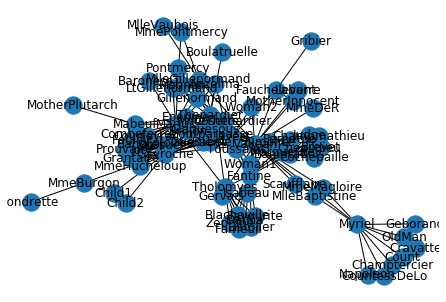

In [0]:
# Part 3: Obtain the data
# Do not modify this cell

# Download the data
lesmis_url = 'http://networkdata.ics.uci.edu/data/lesmis/lesmis.gml' 
response = requests.get(lesmis_url)

# Specify the graph
G = nx.read_gml(BytesIO(response.content))

# Draw the co-appearance graph
layout = nx.spring_layout(G)
nx.draw(G, pos = layout)
labels=nx.draw_networkx_labels(G,pos=layout)
# The labeling isn't super clear; that's okay.  
#     This is just to give us a rough sense of what the graph looks like)


In [0]:
# Part 3, continued: Compute PageRank vector

# Obtaining the adjacency matrix
A = nx.to_numpy_matrix(G) # no need to modify this line
print (A)
print(A.shape) #this prints the numbers of rows and columns of A, for checking correctness

# Using the adjacency matrix, find the transition matrix
T = transition(A)
print (T)
#hint1: np.sum(M) returns vector of sums of columns of matrix M
#hint2: M/v divides each column of matrix M by the corresponding element of vector v


# Find the PageRank vector using Power Method:
v_0 = 1/77 * np.ones([77, 1])
#v_ini = np.tile(v_0, (77, 1))
M_eig = np.empty((77, 1))
for i in range(51):
  v_0 = T * v_0
  if i >= 46:
    M_eig = np.hstack ((M_eig, v_0))
    #print (v_0)
    if i == 50:
      print (M_eig)





In [0]:
# Part 3, continued: Identify the top N most important characters
#main_char1 = M_eig.max(0)
#main_char1_name = np.argmax(M_eig, axis = 0)
rank = np.argsort(v_0, axis = 0)[-10:][::-1]
print (rank)
#print (main_char1, main_char1_name)
#print(v)
# then, identify the index of each of the 3 most important characters


# ------------------------------------------------
# Do not modify below the line
# The code below tells us the characters that corresponds to the indices


name = list(labels.keys())
list(enumerate(name))

* I multiplied the initial vector 50 times to find the eigenvector, and printed out the last five vectors obtained from the iterations. I stacked them in a new matrix, M_eig, to better visualize whether it has reached a limit so that the iteration can be stopped.
* I sort out the largest three components of the final eigenvalue, and the top three important according to the result are Valjean, Gavroche and Marius. The first one makes sense because it IS the most important one. However, the second and third are also major characters but are not necessarily the  most important according to Wikipedia.
* I didn't read Les Miserables, so I couldn't tell why the second and third most important character is not Javert and Fantine as is said in Wikipedia. However, a conjecture is that since the edges represent co-appearance and interaction between characters, it doesn't say anything about the level of closeness between the characters. If a character (node) has a lot of edges, it will have a larger weight in the eigenvector, and will turn out to be "important". So, maybe Gavroche and Marius are not necessarily the most critical ones for the plot, they have a lot of interaction and co-appearance with other minor characters, earning themselves more edges and more weight, thus more importance. While, Javert and Fantine might be really important and interact a lot with the most important character, this frequent interaction is not reflected in this method, and also they might interact or appear together with fewer other characters, earning themselves fewer edges and less weight, thus less importance. But since they are also in the top 6 when print outing out more characters, this method has some accuracy.
* However, this PageRank method has some shortcomings when measuring the importance of nodes in non-webpage searching. Since the PageRank is assuming that every edge is the same in the graph, sometimes when the relationship between nodes are different, the difference is hard to be depicted. Therefore, one way to modify the method is by adding weight to the edge to have the importance reflected in the eigenvector. 

## Reflections

Please briefly write:
1. One new thing that you learn from this project
2. One aspect of this project that you found most interesting OR most challenging OR both.
3. If you discuss any part of the project with anyone ( classmate(s), tutor(s), etc.), please ackowledge them here.

1. One new thing I discovered from this project is that the two different ways of computing eigenvector will lead to different results. (But they are still in the same eigenspace) I also learned some new functions of numpy, like argsort().
2. The most challenging and interesting part is #3 where I came across some problems when the matrix gets larger. For example, I needed to think about ways to format the output a little bit better to visualize the result more easily. I need to type out the initial vector, and transition matrix in a smarter way. Also, I got to explore other possibilities of PageRank algorithm and saw some drawbacks of it, which is really interesting.